In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.interpolate
import sys, platform, os
from matplotlib import pyplot as plt
import camb
from camb import model, initialpower
import matplotlib.pyplot as plt

print(camb.__version__)

1.0.7


In [2]:
# taken from CAMBdemo page (NB I have camb 1.0.4, but CAMBdemo says 1.0.3, maybe explains slight differences?)

pars = camb.CAMBparams()

pars.WantCls = True
pars.WantTransfer = True
pars.WantScalars = True
pars.WantTensors = False
pars.WantVectors = False
pars.WantDerivedParameters = True
pars.Want_cl_2D_array = True
pars.Want_CMB = True
pars.Want_CMB_lensing = True
pars.DoLensing = True
pars.NonLinear = 'NonLinear_both'

pars.Transfer.high_precision = True
pars.Transfer.kmax = 1.3464234

pars.want_zstar = False
pars.want_zdrag = False
pars.min_l = 2
pars.max_l = 2700
pars.max_l_tensor = 600
pars.max_eta_k = 18000.0
pars.max_eta_k_tensor = 1200.0
pars.ombh2 = 0.0223828
pars.omch2 = 0.1201075
pars.omk = 0.0
pars.omnuh2 = 0.0006451439
pars.H0 = 67.32117
pars.TCMB = 2.7255
pars.YHe = 0.2454006
pars.num_nu_massless = 2.046
pars.num_nu_massive = 1
pars.nu_mass_eigenstates = 1
pars.share_delta_neff = True
pars.nu_mass_degeneracies = [0.0]
pars.nu_mass_fractions = [1.0]
pars.nu_mass_numbers = [1]

pars.InitPower.tensor_parameterization = 'tensor_param_indeptilt'
pars.InitPower.ns = 0.9660499
pars.InitPower.nrun = 0.0
pars.InitPower.nrunrun = 0.0
pars.InitPower.nt = 0.0
pars.InitPower.ntrun = 0.0
pars.InitPower.r = 0.0
pars.InitPower.pivot_scalar = 0.05
pars.InitPower.pivot_tensor = 0.05
pars.InitPower.As = 2.100549e-09
pars.InitPower.At = 0.0

pars.Recomb.min_a_evolve_Tm = 0.0011098779505118728
pars.Recomb.RECFAST_fudge = 1.125
pars.Recomb.RECFAST_fudge_He = 0.86
pars.Recomb.RECFAST_Heswitch = 6
pars.Recomb.RECFAST_Hswitch = True
pars.Recomb.AGauss1 = -0.14
pars.Recomb.AGauss2 = 0.079
pars.Recomb.zGauss1 = 7.28
pars.Recomb.zGauss2 = 6.73
pars.Recomb.wGauss1 = 0.18
pars.Recomb.wGauss2 = 0.33

pars.Reion.Reionization = True
pars.Reion.use_optical_depth = True
pars.Reion.redshift = 10.0
pars.Reion.optical_depth = 0.05430842
pars.Reion.delta_redshift = 0.5
pars.Reion.fraction = -1.0
pars.Reion.include_helium_fullreion = True
pars.Reion.helium_redshift = 3.5
pars.Reion.helium_delta_redshift = 0.5
pars.Reion.helium_redshiftstart = 6.0
pars.Reion.tau_solve_accuracy_boost = 1.0
pars.Reion.timestep_boost = 1.0
pars.Reion.max_redshift = 50.0

pars.DarkEnergy.w = -1.0
pars.DarkEnergy.wa = 0.0
pars.DarkEnergy.cs2 = 1.0
pars.DarkEnergy.use_tabulated_w = False

pars.NonLinearModel.Min_kh_nonlinear = 0.005
pars.NonLinearModel.halofit_version = 'mead'

pars.Accuracy.AccuracyBoost = 1.0
pars.Accuracy.lSampleBoost = 1.0
pars.Accuracy.lAccuracyBoost = 1.0
pars.Accuracy.AccuratePolarization = True
pars.Accuracy.AccurateBB = False
pars.Accuracy.AccurateReionization = True
pars.Accuracy.TimeStepBoost = 1.0
pars.Accuracy.BackgroundTimeStepBoost = 1.0
pars.Accuracy.IntTolBoost = 1.0
pars.Accuracy.SourcekAccuracyBoost = 1.0
pars.Accuracy.IntkAccuracyBoost = 1.0
pars.Accuracy.TransferkBoost = 1.0
pars.Accuracy.NonFlatIntAccuracyBoost = 1.0
pars.Accuracy.BessIntBoost = 1.0
pars.Accuracy.LensingBoost = 1.0
pars.Accuracy.NonlinSourceBoost = 1.0
pars.Accuracy.BesselBoost = 1.0
pars.Accuracy.LimberBoost = 1.0
pars.Accuracy.SourceLimberBoost = 1.0
pars.Accuracy.KmaxBoost = 1.0
pars.Accuracy.neutrino_q_boost = 1.0

pars.SourceTerms.limber_windows = True
pars.SourceTerms.limber_phi_lmin = 100
pars.SourceTerms.counts_density = True
pars.SourceTerms.counts_redshift = True
pars.SourceTerms.counts_lensing = False
pars.SourceTerms.counts_velocity = True
pars.SourceTerms.counts_radial = False
pars.SourceTerms.counts_timedelay = True
pars.SourceTerms.counts_ISW = True
pars.SourceTerms.counts_potential = True
pars.SourceTerms.counts_evolve = False
pars.SourceTerms.line_phot_dipole = False
pars.SourceTerms.line_phot_quadrupole = False
pars.SourceTerms.line_basic = True
pars.SourceTerms.line_distortions = True
pars.SourceTerms.line_extra = False
pars.SourceTerms.line_reionization = False
pars.SourceTerms.use_21cm_mK = True

pars.z_outputs = []
pars.scalar_initial_condition = 'initial_adiabatic'
pars.InitialConditionVector = []
pars.OutputNormalization = 1
pars.Alens = 1.0
pars.MassiveNuMethod = 'Nu_trunc'
pars.DoLateRadTruncation = True
pars.Evolve_baryon_cs = False
pars.Evolve_delta_xe = False
pars.Evolve_delta_Ts = False
pars.Do21cm = False
pars.transfer_21cm_cl = False
pars.Log_lvalues = False
pars.use_cl_spline_template = True
pars.SourceWindows = []

In [3]:
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK', raw_cl = True)
Cl = powers['total']

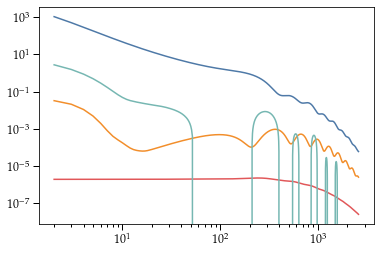

In [4]:
ell = np.arange(len(Cl))
plt.loglog(ell[2:], Cl[2:,0])
plt.loglog(ell[2:], Cl[2:,1])
plt.loglog(ell[2:], Cl[2:,2])
plt.loglog(ell[2:], Cl[2:,3])


In [5]:
# use redshift = 10 instead of tau
Cl[2]

array([1.06412555e+03, 3.23396746e-02, 1.91064153e-06, 2.74486688e+00])

In [6]:
delta = 0.01
pars_deriv = pars.copy()
pars_deriv.Reion.optical_depth = pars.Reion.optical_depth * (1 + delta)
results_deriv = camb.get_results(pars_deriv)
powers_deriv = results_deriv.get_cmb_power_spectra(pars_deriv, CMB_unit='muK', raw_cl = True)
Cl_deriv = powers_deriv['total']
deriv_tau_001 = (Cl_deriv - Cl) / (delta * pars.Reion.optical_depth)


delta = 0.01
pars_deriv = pars.copy()
pars_deriv.Reion.optical_depth = pars.Reion.optical_depth * (1 + delta)
pars_deriv.InitPower.As *= np.exp(2*pars.Reion.optical_depth*delta)
results_deriv = camb.get_results(pars_deriv)
powers_deriv = results_deriv.get_cmb_power_spectra(pars_deriv, CMB_unit='muK', raw_cl = True)
Cl_deriv = powers_deriv['total']
deriv_tau_001 = (Cl_deriv - Cl) / (delta * pars.Reion.optical_depth)

delta = 0.02
pars_deriv = pars.copy()
pars_deriv.Reion.optical_depth = pars.Reion.optical_depth * (1 + delta)
results_deriv = camb.get_results(pars_deriv)
powers_deriv = results_deriv.get_cmb_power_spectra(pars_deriv, CMB_unit='muK', raw_cl = True)
Cl_deriv = powers_deriv['total']
deriv_tau_002 = (Cl_deriv - Cl) / (delta * pars.Reion.optical_depth)

delta = 0.005
pars_deriv = pars.copy()
pars_deriv.Reion.optical_depth = pars.Reion.optical_depth * (1 + delta)
results_deriv = camb.get_results(pars_deriv)
powers_deriv = results_deriv.get_cmb_power_spectra(pars_deriv, CMB_unit='muK', raw_cl = True)
Cl_deriv = powers_deriv['total']
deriv_tau_0005 = (Cl_deriv - Cl) / (delta * pars.Reion.optical_depth)


In [55]:
def get_Cls(tau):
    pars_new = pars.copy()
    Amp = np.exp(-2*pars.Reion.optical_depth)*pars.InitPower.As
    pars_new.Reion.optical_depth = tau
    pars_new.InitPower.As = Amp*np.exp(2*tau)
    results = camb.get_results(pars_new)

    powers = results.get_cmb_power_spectra(pars_new, CMB_unit='muK', raw_cl = True)
    Cl = powers['total']
    return np.array([Cl[:,0], Cl[:,1], Cl[:,2], Cl[:,3]])

def get_Cl_ders(tau, delta=0.02):
    der = (get_Cls(tau*(1+delta)) - get_Cls(tau))/(delta*tau)
    return der
Cl = get_Cls(pars.Reion.optical_depth).T

In [56]:
# Let's do the same thing, but with CLASS.
#from tools import get_spectra_tau


from classy import Class
from scipy.integrate import trapz

def get_tau(thermo, zmax=100, xmin=2e-4):
    eta = thermo['conf. time [Mpc]']
    z = thermo['z']
    x_e = thermo['x_e']
    dtaudeta = thermo["kappa' [Mpc^-1]"]
    sigmaTan_p = dtaudeta/x_e
    integrand = -sigmaTan_p*x_e
    return trapz(integrand[(x_e>xmin) & (z<zmax)], x=eta[(x_e>xmin) & (z<zmax)])

lab = 'transfer_neglect_delta_k_S_e'


from functools import lru_cache
@lru_cache(maxsize=2**5)
def get_spectra_tau(tau, dz=0.5, z_t=28, history=False, spectra=False, both=False,
                all_spectra=False, lmax=100, therm=False, zstartmax=50,
                rescale=True):
    cosmo = Class()
    tau0 = 0.0544
    ln1010A_s = 3.044
    A_s0 = np.exp(ln1010A_s-10*np.log(10))
    params = {
        'output': 'tCl pCl lCl',
        'l_max_scalars': lmax,
        'lensing': 'yes',
        'A_s': A_s0,
        'n_s': 0.9649,
        'omega_b': 0.02237,
        'omega_cdm': 0.1200,
        'H0': 67.36,
        'tau_reio': tau,
        'temperature contributions':'tsw, eisw, lisw, dop, pol'}    
    
    A_s0 = 2.100549e-9
    tau0 = 0.05430842
    params = {'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   'non linear':'halofit',
                   'h':0.6732117,
                   'omega_b':0.0223828,
                   'omega_cdm':0.1201075,
                   'N_ur':2.03066666667,
                   'N_ncdm':1,
                   'omega_ncdm':0.0006451439,
                   'A_s':A_s0,
                   'n_s':0.9660499,
                   'tau_reio':tau,
                   'YHe':0.2454006,
                   'l_max_scalars':5000,
                    'temperature contributions':'tsw, eisw, lisw, dop, pol'}
    # You HAVE TO run struct_cleanup() after every compute step. It adds 20 MB
    # per compute call otherwise.
    cosmo.set(params)
    cosmo.compute()
    thermo = cosmo.get_thermodynamics()
    tau = get_tau(thermo)
    params['A_s'] = A_s0*np.exp(-2*tau0)/np.exp(-2*tau)
    cosmo.struct_cleanup()
    cosmo.set(params)
    cosmo.compute()

    Z = (cosmo.T_cmb()*1e6)**2
    if both:
        thermo = cosmo.get_thermodynamics()
        z, xe = thermo['z'], thermo['x_e']
        cls = cosmo.lensed_cl(lmax)
        cosmo.struct_cleanup()
        ell, EE, TE = cls['ell'], cls['ee'], cls['te']
        if all_spectra:
            return z, xe, ell, EE*Z, TE*Z, cls['tt']*Z
        else:
            return z, xe, ell, EE*Z, TE*Z

    elif therm:
        therm = cosmo.get_thermodynamics()
        cosmo.struct_cleanup()
        return therm
    elif spectra:
        cls = cosmo.lensed_cl(lmax)
        cosmo.struct_cleanup()
        ell, TT, EE, TE = cls['ell'], cls['tt']*Z, cls['ee']*Z, cls['te']*Z
        if all_spectra:
            return ell, EE, TE, TT
        else:
            return ell, EE, TE

    elif history:
        thermo = cosmo.get_thermodynamics()
        cosmo.struct_cleanup()
        z, xe = thermo['z'], thermo['x_e']
        return z, xe
    else:
        return

In [67]:
#'''
def get_Cls(tau, lmax=2700):
    ell, EE, TE, TT = get_spectra_tau(tau, lmax=lmax, spectra=True, all_spectra=True)
    Z = ell*(ell+1)/(2*np.pi)*0+1
    return np.array([TT*Z, EE*Z, 0*EE, TE*Z])
    
def get_Cl_ders(tau, delta=0.02):
    der = (get_Cls(tau*(1+delta)) - get_Cls(tau))/(delta*tau)
    return der
Cl = get_Cls(pars.Reion.optical_depth).T
#'''

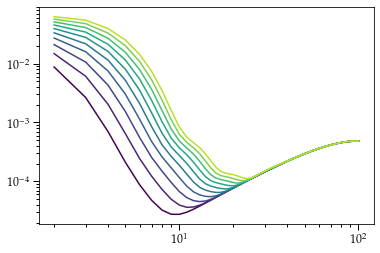

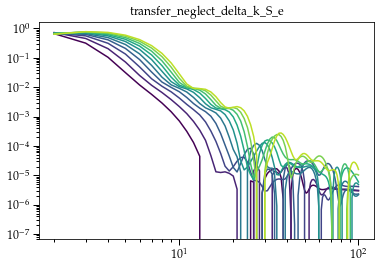

In [68]:
l = np.arange(2, 101)
taus = np.linspace(0.02, 0.1, 10)
for i in range(len(taus)):
    plt.loglog(l, get_Cls(taus[i])[1][l], color=plt.cm.viridis(i/len(taus)))
    
plt.figure()
for i in range(len(taus)):
    plt.loglog(l, get_Cl_ders(taus[i])[1][l], color=plt.cm.viridis(i/len(taus)))

plt.title(f'{lab}'.replace('_','\_'))
plt.savefig(f'{lab}_ders.png', bbox_inches='tight')

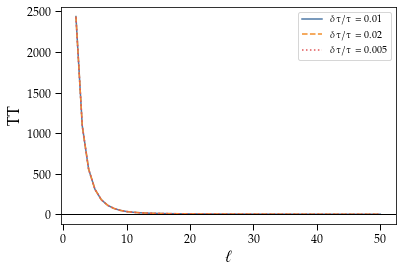

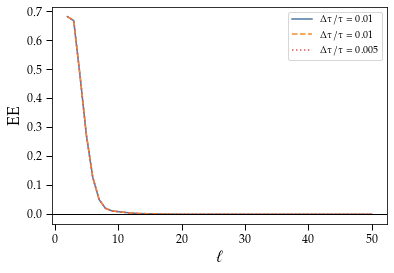

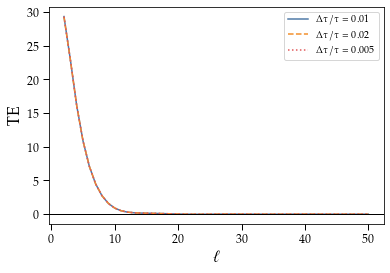

In [69]:
l = np.arange(2, 51)
plt.plot(l, deriv_tau_001[l,0], label=r'$\delta\tau/\tau=0.01$')
plt.plot(l, deriv_tau_002[l,0], linestyle='--', label=r'$\delta\tau/\tau=0.02$')
plt.plot(l, deriv_tau_0005[l,0], linestyle=':', label=r'$\delta\tau/\tau=0.005$')
plt.axhline(0, c='k', lw=1)
plt.legend(loc='best')
plt.ylabel(r'TT')
plt.xlabel(r'$\ell$')

plt.show()
plt.plot(l, deriv_tau_001[l,1], label=r'$\Delta\tau/\tau=0.01$')
plt.plot(l, deriv_tau_002[l,1], linestyle='--', label=r'$\Delta\tau/\tau=0.01$')
plt.plot(l, deriv_tau_0005[l,1], linestyle=':', label=r'$\Delta\tau/\tau=0.005$')
plt.axhline(0, c='k', lw=1)
plt.legend(loc='best')
plt.ylabel(r'EE')
plt.xlabel(r'$\ell$')
plt.show()
plt.plot(l, deriv_tau_001[l,3], label=r'$\Delta\tau/\tau=0.01$')
plt.plot(l, deriv_tau_002[l,3], linestyle='--', label=r'$\Delta\tau/\tau=0.02$')
plt.plot(l, deriv_tau_0005[l,3], linestyle=':', label=r'$\Delta\tau/\tau=0.005$')
plt.axhline(0, c='k', lw=1)
plt.legend(loc='best')
plt.ylabel(r'TE')
plt.xlabel(r'$\ell$')
plt.show()

In [70]:
delta = 0.01
deriv_tau_001 = get_Cl_ders(pars.Reion.optical_depth, delta=delta).T

delta = 0.02
deriv_tau_002 = get_Cl_ders(pars.Reion.optical_depth, delta=delta).T

delta = 0.005
deriv_tau_0005 = get_Cl_ders(pars.Reion.optical_depth, delta=delta).T

print(deriv_tau_001.shape)


(2701, 4)


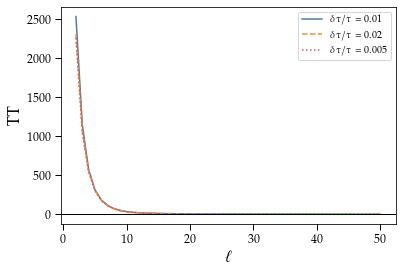

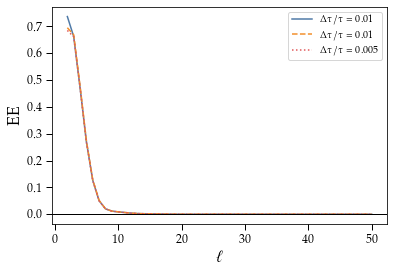

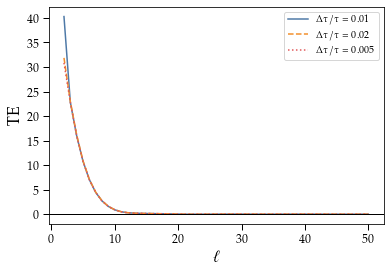

In [71]:
l = np.arange(2, 51)
plt.plot(l, deriv_tau_001[l,0], label=r'$\delta\tau/\tau=0.01$')
plt.plot(l, deriv_tau_002[l,0], linestyle='--', label=r'$\delta\tau/\tau=0.02$')
plt.plot(l, deriv_tau_0005[l,0], linestyle=':', label=r'$\delta\tau/\tau=0.005$')
plt.axhline(0, c='k', lw=1)
plt.legend(loc='best')
plt.ylabel(r'TT')
plt.xlabel(r'$\ell$')

plt.show()
plt.plot(l, deriv_tau_001[l,1], label=r'$\Delta\tau/\tau=0.01$')
plt.plot(l, deriv_tau_002[l,1], linestyle='--', label=r'$\Delta\tau/\tau=0.01$')
plt.plot(l, deriv_tau_0005[l,1], linestyle=':', label=r'$\Delta\tau/\tau=0.005$')
plt.axhline(0, c='k', lw=1)
plt.legend(loc='best')
plt.ylabel(r'EE')
plt.xlabel(r'$\ell$')
plt.show()
plt.plot(l, deriv_tau_001[l,3], label=r'$\Delta\tau/\tau=0.01$')
plt.plot(l, deriv_tau_002[l,3], linestyle='--', label=r'$\Delta\tau/\tau=0.02$')
plt.plot(l, deriv_tau_0005[l,3], linestyle=':', label=r'$\Delta\tau/\tau=0.005$')
plt.axhline(0, c='k', lw=1)
plt.legend(loc='best')
plt.ylabel(r'TE')
plt.xlabel(r'$\ell$')
plt.show()

For a Wishart distribution, the likelihood for a set of theory spectra $\boldsymbol C_\ell$ is
$$
\ln\mathcal L(\boldsymbol C_\ell)=\frac{2\ell-n}{2}\ln|\hat{\boldsymbol{C}}|-\frac{2\ell+1}{2}\ln|\boldsymbol{C}|-\frac{2\ell+1}{2}\mathrm{Tr}(\hat{\boldsymbol{C}}_{\ell}\boldsymbol{C}_{\ell}^{-1})
$$
and its Fisher information is given by
$$
F_{\ell,ij}=\frac{2\ell+1}2\mathrm{Tr}
\left[\boldsymbol C_\ell^{-1}\frac{\partial\boldsymbol C_\ell}{\partial\theta_1}
\boldsymbol C_\ell^{-1}\frac{\partial\boldsymbol C_\ell}{\partial\theta_2}
\right]
$$

I don't know of a way to simplify this in the multidimensional case, but if we are looking at single fields $C_\ell$,
$$
F_{\ell,ij}=\frac{2\ell+1}2\mathrm{Tr}
\left[\frac{\partial\ln C_\ell}{\partial\theta_i}\frac{\partial\ln C_\ell}{\partial\theta_j}
\right]
$$
which is very simple to implement, which is done directly below.

0.06102823459153317
0.0019659071082339477


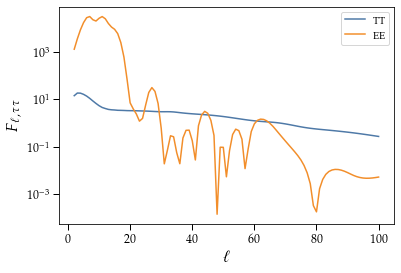

In [72]:
lmin = 2
lmax = 100

l = np.arange(lmin, lmax+1)

fisher_tau_TT = np.sum((deriv_tau_001[l,0]/Cl[l,0])**2*(2*l+1)/2)
fisher_tau_EE = np.sum((deriv_tau_001[l,1]/Cl[l,1])**2*(2*l+1)/2)

print(np.sqrt(1/fisher_tau_TT))
print(np.sqrt(1/fisher_tau_EE))

F_ell_TT = (deriv_tau_001[l,0]/Cl[l,0])**2*(2*l+1)/2
F_ell_EE = (deriv_tau_001[l,1]/Cl[l,1])**2*(2*l+1)/2
plt.plot(l, F_ell_TT, label='TT')
plt.plot(l, F_ell_EE, label='EE')
plt.legend(loc='best')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$F_{\ell,\tau\tau}$')
plt.yscale('log')

In [63]:
# full TT+TE+EE

lmin = 2
lmax = 23

l = np.arange(lmin, lmax+1)

icov_l = np.zeros([lmax+1, 2, 2])
der_l = np.zeros([lmax+1, 2, 2])
tot_l = np.zeros([lmax+1, 2, 2])
for i in range(lmin, lmax+1):
    icov_l[i] = [[Cl[i,1], -Cl[i,3]], [-Cl[i,3], Cl[i,0]]] / (Cl[i,0]*Cl[i,1]-Cl[i,3]**2)
    der_l[i] = [[deriv_tau_001[i,0], deriv_tau_001[i,3]], [deriv_tau_001[i,3], deriv_tau_001[i,1]]]
    tot_l[i] = np.dot(icov_l[i], np.dot(der_l[i], np.dot(icov_l[i], der_l[i])))

F_ell_TTTEEE = (tot_l[l,0,0]+tot_l[l,1,1])*(2*l+1)/2
fisher_tau_TTTEEE = 0.5*np.sum((tot_l[l,0,0]+tot_l[l,1,1])*(2*l+1))
print(np.sqrt(1/fisher_tau_TTTEEE))

0.0015760058567192078


In [64]:
# full TT+TE+EE

lmin = 23
lmax = 100

l = np.arange(lmin, lmax+1)

icov_l = np.zeros([lmax+1, 2, 2])
der_l = np.zeros([lmax+1, 2, 2])
tot_l = np.zeros([lmax+1, 2, 2])
for i in range(lmin, lmax+1):
    icov_l[i] = [[Cl[i,1], -Cl[i,3]], [-Cl[i,3], Cl[i,0]]] / (Cl[i,0]*Cl[i,1]-Cl[i,3]**2)
    der_l[i] = [[deriv_tau_001[i,0], deriv_tau_001[i,3]], [deriv_tau_001[i,3], deriv_tau_001[i,1]]]
    tot_l[i] = np.dot(icov_l[i], np.dot(der_l[i], np.dot(icov_l[i], der_l[i])))

F_ell_TTTEEE = (tot_l[l,0,0]+tot_l[l,1,1])*(2*l+1)/2
fisher_tau_TTTEEE = 0.5*np.sum((tot_l[l,0,0]+tot_l[l,1,1])*(2*l+1))
print(np.sqrt(1/fisher_tau_TTTEEE))

0.057910784865644924


In [65]:
# full TT+TE+EE

lmin = 2
lmax = 100

l = np.arange(lmin, lmax+1)

icov_l = np.zeros([lmax+1, 2, 2])
der_l = np.zeros([lmax+1, 2, 2])
tot_l = np.zeros([lmax+1, 2, 2])
for i in range(lmin, lmax+1):
    icov_l[i] = [[Cl[i,1], -Cl[i,3]], [-Cl[i,3], Cl[i,0]]] / (Cl[i,0]*Cl[i,1]-Cl[i,3]**2)
    der_l[i] = [[deriv_tau_001[i,0], deriv_tau_001[i,3]], [deriv_tau_001[i,3], deriv_tau_001[i,1]]]
    tot_l[i] = np.dot(icov_l[i], np.dot(der_l[i], np.dot(icov_l[i], der_l[i])))

F_ell_TTTEEE = (tot_l[l,0,0]+tot_l[l,1,1])*(2*l+1)/2
fisher_tau_TTTEEE = 0.5*np.sum((tot_l[l,0,0]+tot_l[l,1,1])*(2*l+1))
print(np.sqrt(1/fisher_tau_TTTEEE))

0.0015754738975367348


In [34]:
'''
# Estimate TE-only contribution by taking away TT and EE fisher info. This doesn't work when the param dependence is
# in the covariance...
print(np.sqrt(1/(fisher_tau_TTTEEE - fisher_tau_TT - fisher_tau_EE)))

plt.plot(l, F_ell_TTTEEE, label='TTTEEE')
plt.plot(l, F_ell_TT, label='TT')
plt.plot(l, F_ell_EE, label='EE')
plt.plot(l, F_ell_TTTEEE-F_ell_TT-F_ell_EE, label='TE')
plt.yscale('log')
plt.legend(loc='best')
'''

"\n# Estimate TE-only contribution by taking away TT and EE fisher info. This doesn't work when the param dependence is\n# in the covariance...\nprint(np.sqrt(1/(fisher_tau_TTTEEE - fisher_tau_TT - fisher_tau_EE)))\n\nplt.plot(l, F_ell_TTTEEE, label='TTTEEE')\nplt.plot(l, F_ell_TT, label='TT')\nplt.plot(l, F_ell_EE, label='EE')\nplt.plot(l, F_ell_TTTEEE-F_ell_TT-F_ell_EE, label='TE')\nplt.yscale('log')\nplt.legend(loc='best')\n"

In [19]:
# estimate TE-only contribution by marginalizing over ClTT and ClEE

lmin = 2
lmax = 23

l = np.arange(lmin, lmax+1)

icov_l = np.zeros([lmax+1, 2, 2])
der_l = np.zeros([lmax+1, 2, 2])
der_l_TT = np.zeros([lmax+1, 2, 2])
der_l_TE = np.zeros([lmax+1, 2, 2])
der_l_EE = np.zeros([lmax+1, 2, 2])
fisher_l_tau_tau = np.zeros([lmax+1])
fisher_l_tau_TT = np.zeros([lmax+1])
fisher_l_tau_TE = np.zeros([lmax+1])
fisher_l_tau_EE = np.zeros([lmax+1])
fisher_l_TT_TT = np.zeros([lmax+1])
fisher_l_TT_TE = np.zeros([lmax+1])
fisher_l_TT_EE = np.zeros([lmax+1])
fisher_l_TE_TE = np.zeros([lmax+1])
fisher_l_TE_EE = np.zeros([lmax+1])
fisher_l_EE_EE = np.zeros([lmax+1])

for i in range(lmin, lmax+1):
    icov_l[i] = [[Cl[i,1], -Cl[i,3]], [-Cl[i,3], Cl[i,0]]] / (Cl[i,0]*Cl[i,1]-Cl[i,3]**2)
    der_l[i] = [[deriv_tau_001[i,0], deriv_tau_001[i,3]], [deriv_tau_001[i,3], deriv_tau_001[i,1]]]
    der_l_TT[i] = [[1, 0], [0, 0]]
    der_l_TE[i] = [[0, 1], [1, 0]]
    der_l_EE[i] = [[0, 0], [0, 1]]
    
    temp = np.dot(icov_l[i], np.dot(der_l[i], np.dot(icov_l[i], der_l[i])))
    fisher_l_tau_tau[i] = np.trace(temp)*(2*i+1)/2
    
    temp = np.dot(icov_l[i], np.dot(der_l[i], np.dot(icov_l[i], der_l_TT[i])))
    fisher_l_tau_TT[i] = np.trace(temp)*(2*i+1)/2
    
    temp = np.dot(icov_l[i], np.dot(der_l[i], np.dot(icov_l[i], der_l_TE[i])))
    fisher_l_tau_TE[i] = np.trace(temp)*(2*i+1)/2
    
    temp = np.dot(icov_l[i], np.dot(der_l[i], np.dot(icov_l[i], der_l_EE[i])))
    fisher_l_tau_EE[i] = np.trace(temp)*(2*i+1)/2
    
    temp = np.dot(icov_l[i], np.dot(der_l_TT[i], np.dot(icov_l[i], der_l_TT[i])))
    fisher_l_TT_TT[i] = np.trace(temp)*(2*i+1)/2
    
    temp = np.dot(icov_l[i], np.dot(der_l_TT[i], np.dot(icov_l[i], der_l_TE[i])))
    fisher_l_TT_TE[i] = np.trace(temp)*(2*i+1)/2
    
    temp = np.dot(icov_l[i], np.dot(der_l_TT[i], np.dot(icov_l[i], der_l_EE[i])))
    fisher_l_TT_EE[i] = np.trace(temp)*(2*i+1)/2
    
    temp = np.dot(icov_l[i], np.dot(der_l_TE[i], np.dot(icov_l[i], der_l_TE[i])))
    fisher_l_TE_TE[i] = np.trace(temp)*(2*i+1)/2
    
    temp = np.dot(icov_l[i], np.dot(der_l_TE[i], np.dot(icov_l[i], der_l_EE[i])))
    fisher_l_TE_EE[i] = np.trace(temp)*(2*i+1)/2
    
    temp = np.dot(icov_l[i], np.dot(der_l_EE[i], np.dot(icov_l[i], der_l_EE[i])))
    fisher_l_EE_EE[i] = np.trace(temp)*(2*i+1)/2

In [20]:
# marginalize over ClTT
fisher = np.zeros([1+(lmax+1-lmin), 1+(lmax+1-lmin)])
fisher[0, 0] = np.sum(fisher_l_tau_tau)
for i in range(lmin, lmax+1):
    fisher[0, 1+i-lmin] = fisher[1+i-lmin, 0] = fisher_l_tau_TT[i]
    fisher[1+i-lmin, 1+i-lmin] = fisher_l_TT_TT[i]
print('marg TT:', np.sqrt(np.linalg.inv(fisher)[0,0]))

# marginalize over ClTE
fisher = np.zeros([1+(lmax+1-lmin), 1+(lmax+1-lmin)])
fisher[0, 0] = np.sum(fisher_l_tau_tau)
for i in range(lmin, lmax+1):
    fisher[0, 1+i-lmin] = fisher[1+i-lmin, 0] = fisher_l_tau_TE[i]
    fisher[1+i-lmin, 1+i-lmin] = fisher_l_TE_TE[i]
print('marg TE:', np.sqrt(np.linalg.inv(fisher)[0,0]))

# marginalize over ClEE
fisher = np.zeros([1+(lmax+1-lmin), 1+(lmax+1-lmin)])
fisher[0, 0] = np.sum(fisher_l_tau_tau)
for i in range(lmin, lmax+1):
    fisher[0, 1+i-lmin] = fisher[1+i-lmin, 0] = fisher_l_tau_EE[i]
    fisher[1+i-lmin, 1+i-lmin] = fisher_l_EE_EE[i]
print('marg EE:', np.sqrt(np.linalg.inv(fisher)[0,0]))

# marginalize over ClTT and ClTE
fisher = np.zeros([1+2*(lmax+1-lmin), 1+2*(lmax+1-lmin)])
fisher[0, 0] = np.sum(fisher_l_tau_tau)
for i in range(lmin, lmax+1):
    fisher[0, 1+i-lmin] = fisher[1+i-lmin, 0] = fisher_l_tau_TT[i]
    fisher[1+i-lmin, 1+i-lmin] = fisher_l_TT_TT[i]
    fisher[0, 1+lmax+1-lmin+i-lmin] = fisher[1+lmax+1-lmin+i-lmin, 0] = fisher_l_tau_TE[i]
    fisher[1+i-lmin, 1+lmax+1-lmin+i-lmin] = fisher[1+lmax+1-lmin+i-lmin, 1+i-lmin] = fisher_l_TT_TE[i]
    fisher[1+lmax+1-lmin+i-lmin, 1+lmax+1-lmin+i-lmin] = fisher_l_TE_TE[i]
print('marg TT and TE:', np.sqrt(np.linalg.inv(fisher)[0,0]))

# marginalize over ClTT and ClEE
fisher = np.zeros([1+2*(lmax+1-lmin), 1+2*(lmax+1-lmin)])
fisher[0, 0] = np.sum(fisher_l_tau_tau)
for i in range(lmin, lmax+1):
    fisher[0, 1+i-lmin] = fisher[1+i-lmin, 0] = fisher_l_tau_TT[i]
    fisher[1+i-lmin, 1+i-lmin] = fisher_l_TT_TT[i]
    fisher[0, 1+lmax+1-lmin+i-lmin] = fisher[1+lmax+1-lmin+i-lmin, 0] = fisher_l_tau_EE[i]
    fisher[1+i-lmin, 1+lmax+1-lmin+i-lmin] = fisher[1+lmax+1-lmin+i-lmin, 1+i-lmin] = fisher_l_TT_EE[i]
    fisher[1+lmax+1-lmin+i-lmin, 1+lmax+1-lmin+i-lmin] = fisher_l_EE_EE[i]
print('marg TT and EE:', np.sqrt(np.linalg.inv(fisher)[0,0]))

# marginalize over ClTE and ClEE
fisher = np.zeros([1+2*(lmax+1-lmin), 1+2*(lmax+1-lmin)])
fisher[0, 0] = np.sum(fisher_l_tau_tau)
for i in range(lmin, lmax+1):
    fisher[0, 1+i-lmin] = fisher[1+i-lmin, 0] = fisher_l_tau_TE[i]
    fisher[1+i-lmin, 1+i-lmin] = fisher_l_TE_TE[i]
    fisher[0, 1+lmax+1-lmin+i-lmin] = fisher[1+lmax+1-lmin+i-lmin, 0] = fisher_l_tau_EE[i]
    fisher[1+i-lmin, 1+lmax+1-lmin+i-lmin] = fisher[1+lmax+1-lmin+i-lmin, 1+i-lmin] = fisher_l_TE_EE[i]
    fisher[1+lmax+1-lmin+i-lmin, 1+lmax+1-lmin+i-lmin] = fisher_l_EE_EE[i]
print('marg TE and EE:', np.sqrt(np.linalg.inv(fisher)[0,0]))

marg TT: 0.0016066611652187524
marg TE: 0.0018369095094061124
marg EE: 0.005508964650506505
marg TT and TE: 0.0019473690318175842
marg TT and EE: 0.007484642940671898
marg TE and EE: 0.08122615358922429


In [21]:
# only use TE to constrain tau, but assume TT and EE theory spectra known

lmin = 2
lmax = 23

l = np.arange(lmin, lmax+1)

icov_l = np.zeros([lmax+1, 2, 2])
der_l = np.zeros([lmax+1, 2, 2])
tot_l = np.zeros([lmax+1, 2, 2])
for i in range(lmin, lmax+1):
    icov_l[i,0,0] = Cl[i,1]
    icov_l[i,0,1] = icov_l[i,1,0] = -Cl[i,3]
    icov_l[i,1,1] = Cl[i,0]
    icov_l[i] /= (Cl[i,0]*Cl[i,1]-Cl[i,3]**2)
    #der_l[i,0,0] = deriv_tau_001[i,0]
    der_l[i,0,1] = der_l[i,1,0] = deriv_tau_001[i,3]
    #der_l[i,1,1] = deriv_tau_001[i,1]
    tot_l[i] = np.dot(icov_l[i], np.dot(der_l[i], np.dot(icov_l[i], der_l[i])))

fisher_tau_TE = 0.5*np.sum((tot_l[l,0,0]+tot_l[l,1,1])*(2*l+1))
print(np.sqrt(1/fisher_tau_TE))

0.003623408447077895


In [22]:
# only use TE to constrain tau, but assume TT and EE theory spectra known

lmin = 2
lmax = 23

l = np.arange(lmin, lmax+1)

icov_l = np.zeros([lmax+1, 2, 2])
der_l = np.zeros([lmax+1, 2, 2])
tot_l = np.zeros([lmax+1, 2, 2])
for i in range(lmin, lmax+1):
    icov_l[i,0,0] = Cl[i,1]
    icov_l[i,0,1] = icov_l[i,1,0] = -Cl[i,3]
    icov_l[i,1,1] = Cl[i,0]
    icov_l[i] /= (Cl[i,0]*Cl[i,1]-Cl[i,3]**2)
    #der_l[i,0,0] = deriv_tau_001[i,0]
    der_l[i,0,1] = der_l[i,1,0] = deriv_tau_001[i,3]
    #der_l[i,1,1] = deriv_tau_001[i,1]
    tot_l[i] = np.dot(icov_l[i], np.dot(der_l[i], np.dot(icov_l[i], der_l[i])))

fisher_tau_TE = 0.5*np.sum((tot_l[l,0,0]+tot_l[l,1,1])*(2*l+1))
print(np.sqrt(1/fisher_tau_TE))

0.003623408447077895


In [23]:
# take out T information (effectively blow up alm^T error)

lmin = 2
lmax = 23

f = 1e6

l = np.arange(lmin, lmax+1)

icov_l = np.zeros([lmax+1, 2, 2])
der_l = np.zeros([lmax+1, 2, 2])
tot_l = np.zeros([lmax+1, 2, 2])
for i in range(lmin, lmax+1):
    #icov_l[i,0,0] = Cl[i,1]
    #icov_l[i,0,1] = icov_l[i,1,0] = -Cl[i,3]
    icov_l[i,1,1] = 1/Cl[i,1]
    #icov_l[i] /= (f*Cl[i,0]*Cl[i,1]-Cl[i,3]**2)
    der_l[i,0,0] = deriv_tau_001[i,0]
    der_l[i,0,1] = der_l[i,1,0] = deriv_tau_001[i,3]
    der_l[i,1,1] = deriv_tau_001[i,1]
    tot_l[i] = np.dot(icov_l[i], np.dot(der_l[i], np.dot(icov_l[i], der_l[i])))

fisher_tau_TTTEEE = 0.5*np.sum((tot_l[l,0,0]+tot_l[l,1,1])*(2*l+1))
print(np.sqrt(1/fisher_tau_TTTEEE))

0.0019473690318175846


In [24]:
# take out E information (effectively blow up alm^T error)

lmin = 2
lmax = 23

f = 1e6

l = np.arange(lmin, lmax+1)

icov_l = np.zeros([lmax+1, 2, 2])
der_l = np.zeros([lmax+1, 2, 2])
tot_l = np.zeros([lmax+1, 2, 2])
for i in range(lmin, lmax+1):
    icov_l[i,0,0] = 1/Cl[i,0]
    #icov_l[i,0,1] = icov_l[i,1,0] = -Cl[i,3]
    #icov_l[i,1,1] = 1/Cl[i,1]
    #icov_l[i] /= (f*Cl[i,0]*Cl[i,1]-Cl[i,3]**2)
    der_l[i,0,0] = deriv_tau_001[i,0]
    der_l[i,0,1] = der_l[i,1,0] = deriv_tau_001[i,3]
    der_l[i,1,1] = deriv_tau_001[i,1]
    tot_l[i] = np.dot(icov_l[i], np.dot(der_l[i], np.dot(icov_l[i], der_l[i])))

fisher_tau_TTTEEE = 0.5*np.sum((tot_l[l,0,0]+tot_l[l,1,1])*(2*l+1))
print(np.sqrt(1/fisher_tau_TTTEEE))

0.08122615358920783
